WEEK 8

Each XLS or XLSX file contains a dataframe. ​

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

Count the number of missing values in the dataframe; count the number of missing values per column​
Plot the distribution of data points using a histogram​
Create a lag plot (a lag plot shows t versus t+1)​
Based on the lag plot, state in a markdown cell whether the order of this data matters. ​
Do one of the following (not both):​
If the order of the data matters, then interpolate the missing values​
If the order of the data does not matter, fill in the missing data by sampling from the distribution​
Create a scatter plot using the columns in dataframe; no Nan entries should be present​
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​

Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, scatter_matrix

In [5]:
#Read all the files
df1=pd.read_excel("imputation_homework_04.xls")
df2=pd.read_excel("imputation_homework_29.xlsx")
df3=pd.read_excel("imputation_homework_91.xlsx")

In [6]:
#Check for missing values in each column
df1.info()
print(f"\n\n\nTotal missing values in Homework_04: {df1.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   time        500 non-null    float64
 2   value       450 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB



Total missing values in Homework_04: 50


In [7]:
df2.info()
print(f"\n\n\nTotal missing values in Homework_29: {df2.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  108 non-null    int64  
 1   x           99 non-null     float64
 2   y           108 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB



Total missing values in Homework_29: 9


In [8]:
df3.info()
print(f"\n\n\nTotal missing values in Homework_91: {df3.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  852 non-null    int64         
 1   date        852 non-null    datetime64[ns]
 2   value       768 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.1 KB



Total missing values in Homework_91: 84


#### Graphs for 1st file imputation_homework_04.xls

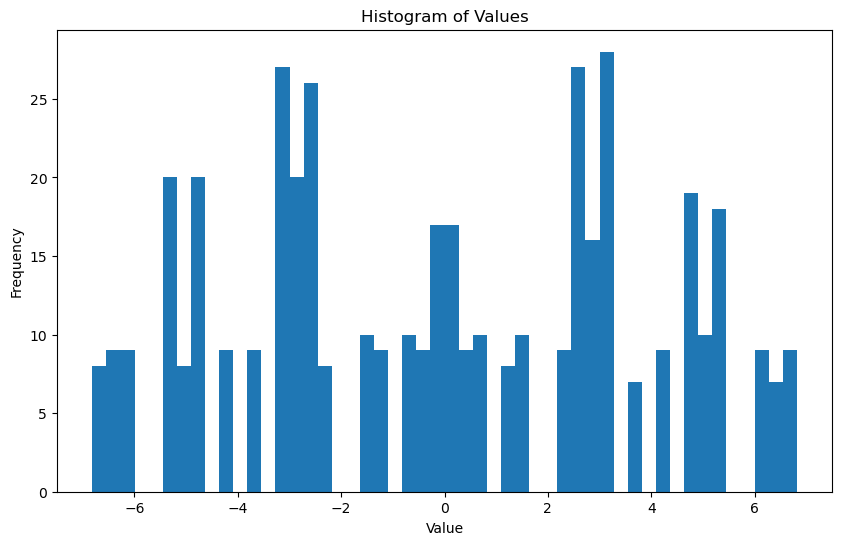

In [10]:
#Plot a histogram for values
df1['value'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

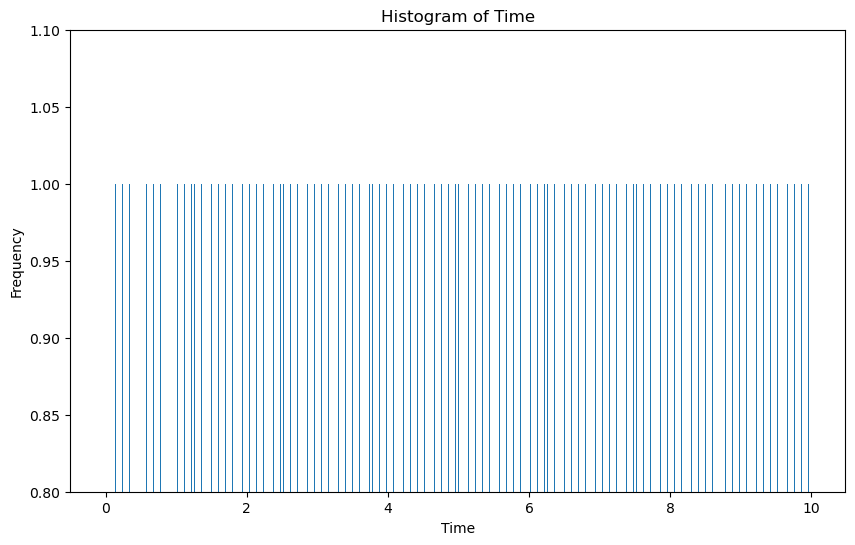

In [11]:
#Plotting histogram for time, not really needed
df1['time'].plot(kind='hist', bins=4000, figsize=(10, 6))
plt.title('Histogram of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0.8, 1.1)
plt.show()

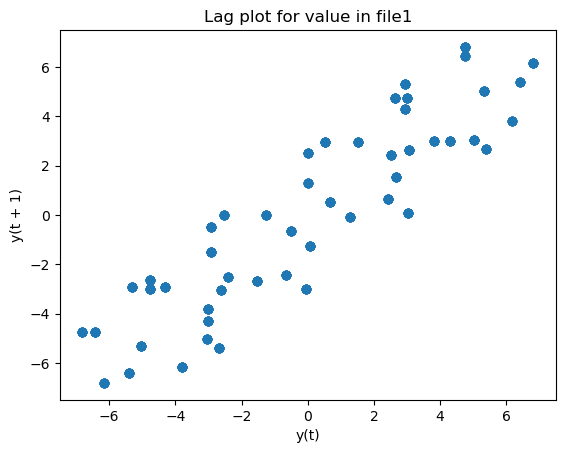

In [12]:
lag_plot(df1.iloc[:,2])#only for value column
plt.title(f"Lag plot for value in file1")
plt.show()

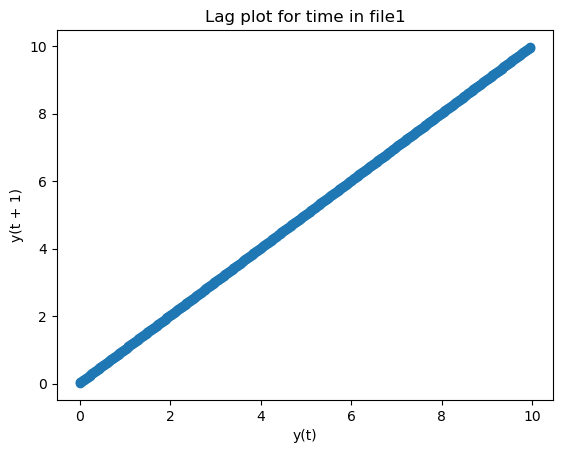

In [13]:
lag_plot(df1.iloc[:,1]) #only for time column
plt.title(f"Lag plot for time in file1")
plt.show()
##not really needed

In this case the order of data matters as we can clearly see a diagnal pattern, interpolating the values-

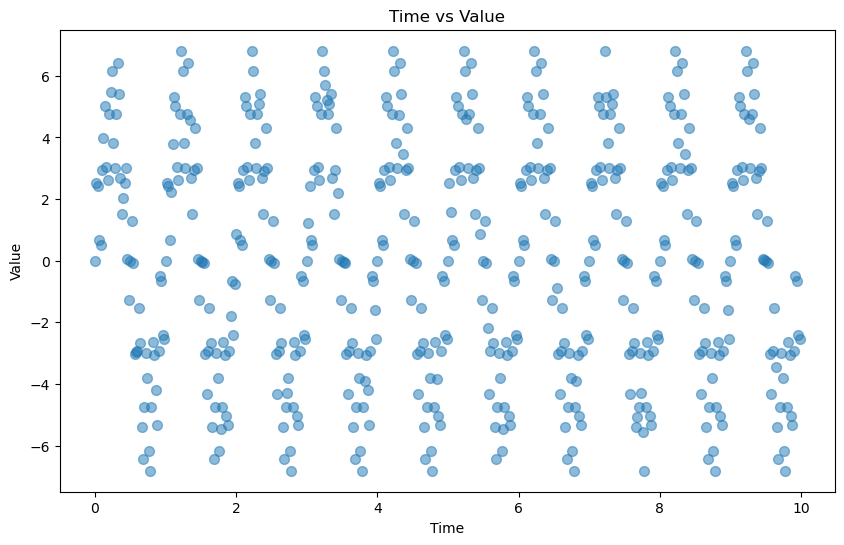

In [15]:
df1['value'] = df1['value'].interpolate()

# Create a scatter plot with increased space between points
plt.figure(figsize=(10, 6))
plt.scatter(df1['time'], df1['value'], s=50, alpha=0.5)  
plt.title('Time vs Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Graphs for 2nd file imputation_homework_29.xlsx

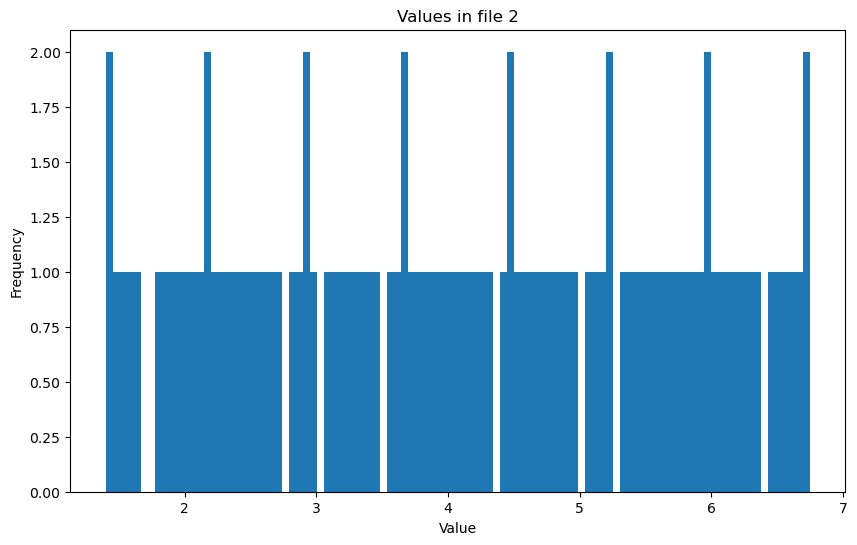

In [17]:
df2['x'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Values in file 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

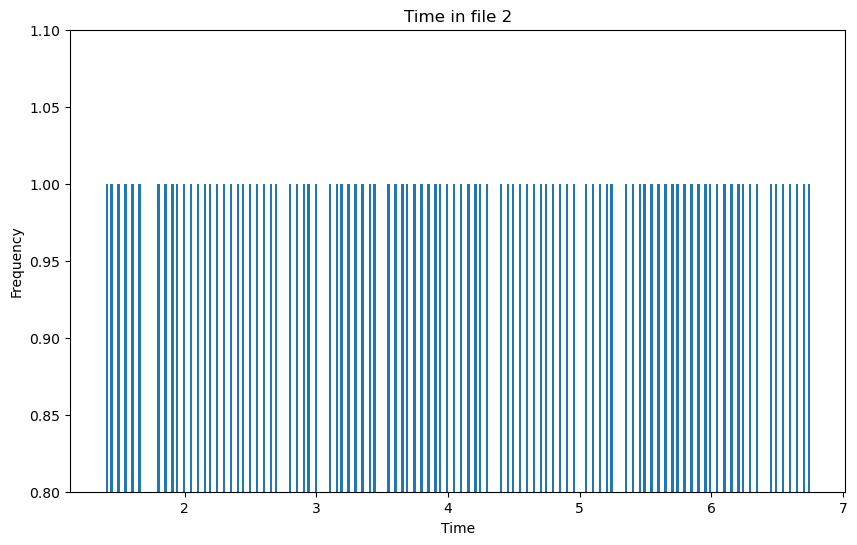

In [18]:
df2['x'].plot(kind='hist',  bins=300,figsize=(10, 6))
plt.title('Time in file 2')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0.8, 1.1) 
plt.show()
##not really needed

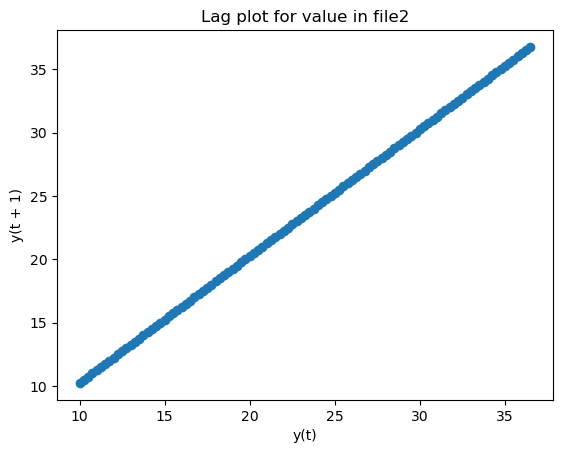

In [19]:
lag_plot(df2.iloc[:,2])#only for value column
plt.title(f"Lag plot for value in file2")
plt.show()

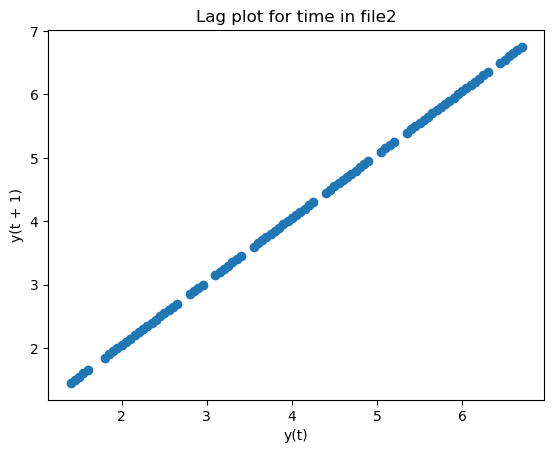

In [20]:
lag_plot(df2.iloc[:,1]) #only for time column
plt.title(f"Lag plot for time in file2")
plt.show()
##not really needed

We can see a pattern here as well

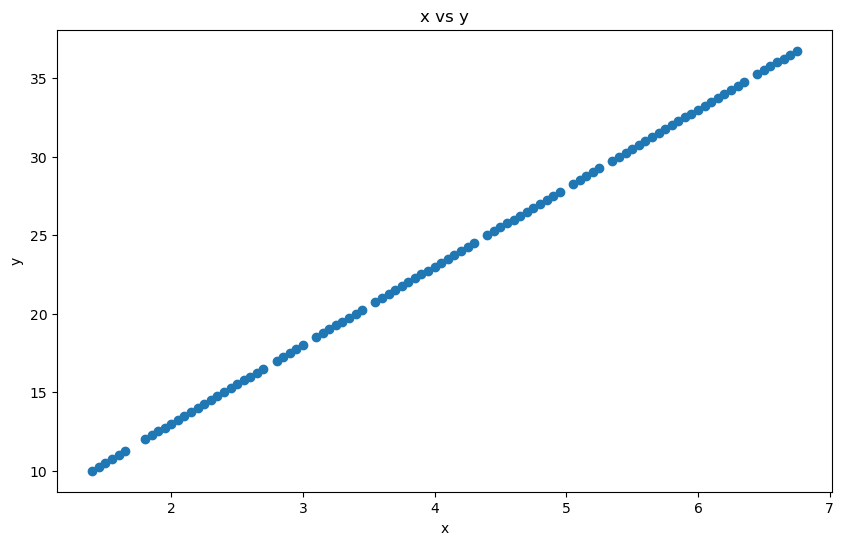

In [22]:
df2['y'] = df2['y'].interpolate()
#interpolating and displaying the values

plt.figure(figsize=(10, 6))
plt.scatter(df2['x'], df2['y'])  
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Graphs for 3rd file imputation_homework_91.xlsx

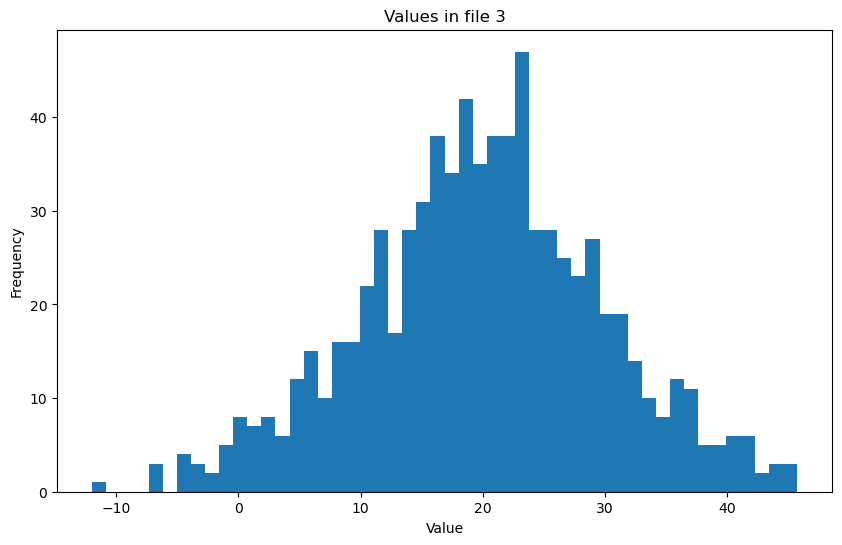

In [24]:
df3['value'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Values in file 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

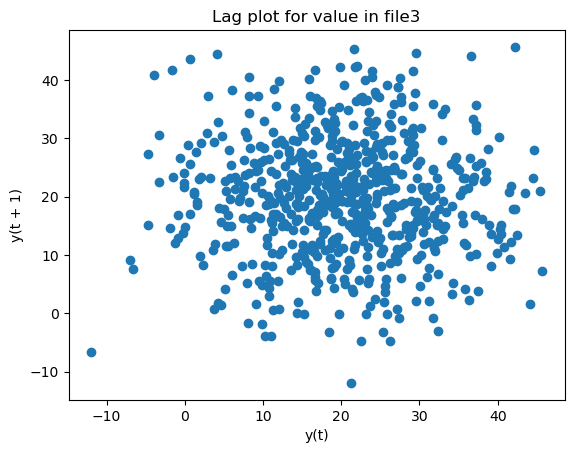

In [25]:
lag_plot(df3.iloc[:,2])#only for value column
plt.title(f"Lag plot for value in file3")
plt.show()

As the lag plot is random and shows no particular correlation,filling in the missing data by sampling from the distribution​

In [27]:
x= df3['value'].isna().sum()#number of missing values 
sampleValues = df3['value'].dropna().sample(x, replace=True).values 
df3['value'].loc[df3['value'].isna()]=sampleValues
#dropping the missing values, randomly sampling x non-NaN values from the column with replacement

C:\Users\Yatharth\AppData\Local\Temp\ipykernel_11352\3800529664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['value'].loc[df3['value'].isna()]=sampleValues


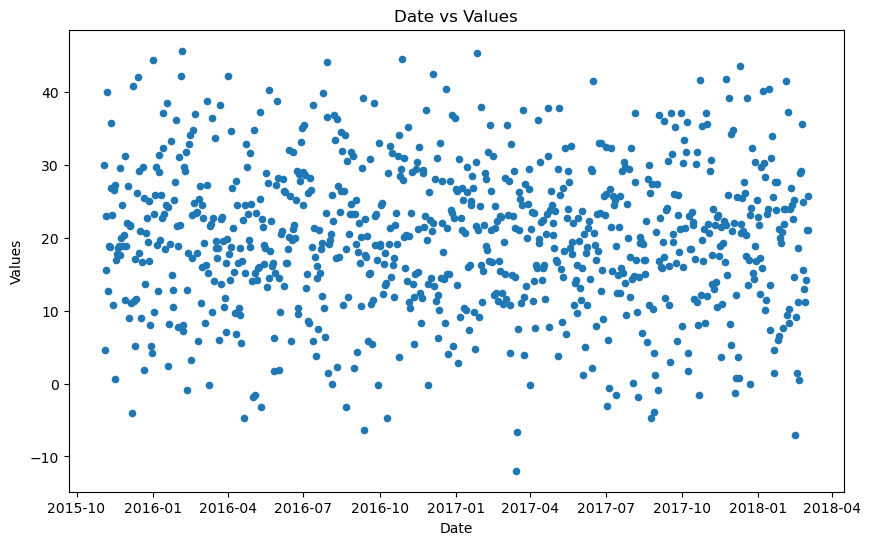

In [28]:
df3.plot(kind='scatter', x='date', y='value', figsize=(10, 6))
plt.title('Date vs Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()